

##Prosedür 1 – Scikit-learn kütüphanesi ve eğitim ve test için Verilerin Bölünmesi

Adım 1 – Birçok denetimsiz ve denetimli öğrenmeyi sağlayan Scikit-learn (sklearn) kütüphanesini kurmamız gerekiyor
Python programlama dili için algoritmalar. Bunu yapmak için aşağıdaki pip komutunu kullanın.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
import pandas as pd
from scipy import stats

car_dataset = pd.read_csv('OLX_Car_Data_CSV.csv')

In [5]:
car_dataset

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0
24970,Other Brands,Used,CNG,158715.0,Other,180000,NaN,Cash,2000.0
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0


In [6]:
car_dataset.shape

(24973, 9)

In [7]:
car_dataset.dropna(inplace=True) # NaN ifadelei kaldırır

In [8]:
car_dataset.shape

(20334, 9)

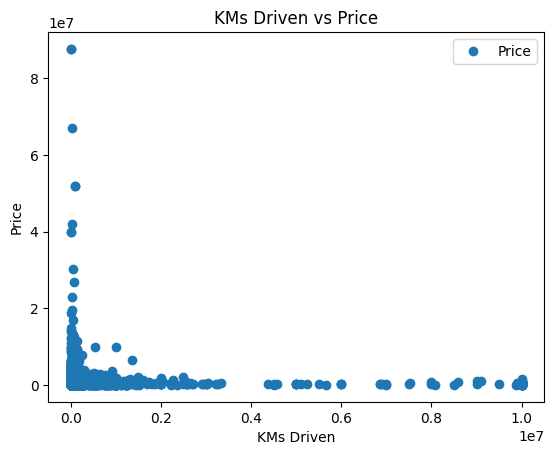

In [9]:
import matplotlib.pyplot as plt

car_dataset.plot(x='KMs Driven',  y='Price', style='o')
plt.title('KMs Driven vs Price')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.show()

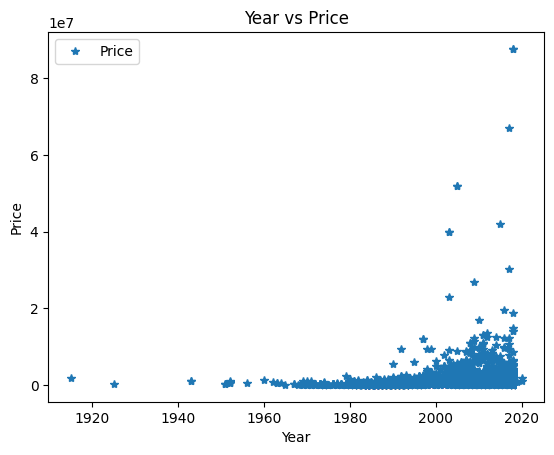

In [10]:
import matplotlib.pyplot as plt

car_dataset.plot(x='Year',  y='Price', style='*')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [11]:
X = car_dataset['KMs Driven'].values.reshape(-1,1)
y = car_dataset['Price'].values.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

Adım 8 - Verileri eğitim ve test setlerine böldükten sonra son olarak algoritmamızı eğitme zamanı gelir. Bunun için biz
LinearRegression sınıfını içe aktarmamız, somutlaştırmamız ve eğitim verilerimizle birlikte fit() yöntemini çağırmamız gerekiyor.

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Adım 9 - Doğrusal regresyon modeli, kesişme ve eğim için en iyi değeri bulur ve bu da en iyi sonucu veren bir çizgiyle sonuçlanır.
verilere uyuyor. Veri setimiz için doğrusal regresyon algoritması tarafından hesaplanan kesişme ve eğim değerini görmek için,
aşağıdaki kodu yürütün.

In [15]:
print(regressor.intercept_)

print(regressor.coef_)

[877318.61861663]
[[-0.08032885]]


Bu, Min sıcaklıktaki her bir birim değişim için Maksimum sıcaklıktaki değişimin yaklaşık %0,92 olduğu anlamına gelir.
Adım 10 - Artık algoritmamızı eğittiğimize göre bazı tahminlerde bulunmanın zamanı geldi. Bunu yapmak için testimizi kullanacağız.
verileri inceleyin ve algoritmamızın yüzde puanını ne kadar doğru tahmin ettiğini görün. Test verileri üzerinde tahminlerde bulunmak için,
aşağıdaki kodu yürütün.

In [14]:
y_pred = regressor.predict(y_test)

Adım 11 - Şimdi X_test'in gerçek çıkış değerlerini tahmin edilen değerlerle karşılaştırın, aşağıdaki kodu çalıştırın.

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,685000,822293.356215
1,799999,813055.618769
2,650000,825104.865973
3,360000,848400.232537
4,480000,838760.770511
...,...,...
6096,875500,806990.710248
6097,195000,861654.492824
6098,2075000,710636.254409
6099,1540000,753612.189277
